In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My\ Drive/

/content/drive/My Drive


In [3]:
ls

'Colab Notebooks'/                 'ForumPerformanceDataV3 (1).csv'
'ForumPerformanceDataNew (1).csv'   ForumPerformanceDataV3.csv
 ForumPerformanceDataNew.csv        Onehack_category.csv
 ForumPerformanceDataV2.csv         Onehack_features.pickle


In [4]:
import pickle
import pandas as pd
with open("Onehack_features.pickle", 'rb') as pickle_file:
  X = pickle.load(pickle_file)

In [5]:
y = pd.read_csv ("Onehack_category.csv")
X = pd.DataFrame(X)

In [6]:
y = y.drop('Unnamed: 0',1)
num_classes = len(y['0'].unique())
y['0'].value_counts().sort_values()

 Special Day &amp; Event                        2
 Forum Rules, Instructions &amp; Updates        3
 Barter System                                 11
 Feedback &amp; Thoughts                       18
 Scammer's List                                27
 Life Lessons &amp; Experience                 32
 Money Making Methods &amp; Guides            168
 Tools &amp; Scripts                          507
 News &amp; Articles                          920
 Discussion &amp; Solutions                  1058
 Tutorials &amp; Methods                     1834
Away and Freebies                            3820
Name: 0, dtype: int64

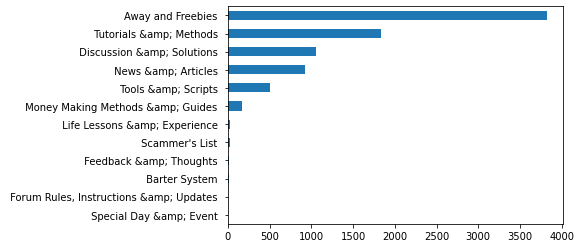

In [7]:
import matplotlib.pyplot as plt
y['0'].value_counts().sort_values().plot(kind = 'barh')
plt.show()

In [8]:
drop_cat=[]
counts = dict(y['0'].value_counts())
for cat in counts.keys():
  if counts[cat]<500:
    drop_cat.append(cat)

In [9]:
Data = pd.concat([y,X],axis=1)
print(Data.shape)
for cat in drop_cat:
  Data.drop(Data.loc[Data['0'] == cat].index, inplace=True)

(8400, 769)


In [10]:
Data.shape

(8139, 769)

In [11]:
y = Data['0']
X = Data.drop('0',axis=1)

In [12]:
num_classes = len(y.unique())

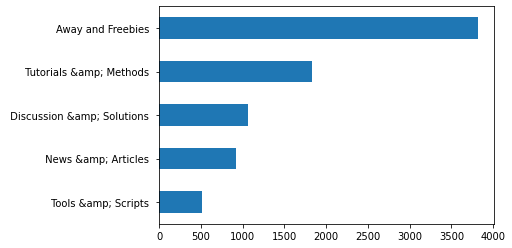

In [13]:
y.value_counts().sort_values().plot(kind = 'barh')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
from xgboost import XGBClassifier

# Create a classifier
xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', eval_metric="auc", num_class=num_classes)

In [16]:
X_train.shape

(5453, 768)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#-------------------------------------------------------------------------------------------#

In [121]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

acc = []
comp = []

for i in range(2,768):
  pca1 = PCA(n_components= i)
  X_train_PCA = pca1.fit_transform(X_train)
  X_test_PCA = pca1.transform(X_test)

  model1 = RandomForestClassifier(n_estimators=11, max_depth=None, random_state=0)
  model1.fit(X_train_PCA, y_train)
  y_pred1 = model1.predict(X_test_PCA)
  accur = accuracy_score(y_test, y_pred1)
  acc.append(accur)
  comp.append(i)
  if i % 10 == 0:
    print(i)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760


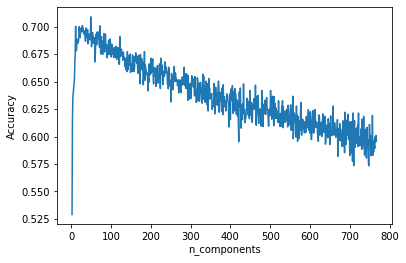

In [122]:
plt.plot(comp, acc)
plt.ylabel('Accuracy')
plt.xlabel('n_components')
plt.show()

In [18]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

pca1 = PCA(n_components= 49)
X_train_PCA = pca1.fit_transform(X_train)
X_test_PCA = pca1.transform(X_test)

model1 = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
model1.fit(X_train_PCA, y_train)
y_pred1 = model1.predict(X_test_PCA)
accur = accuracy_score(y_test, y_pred1)
print(accur)

0.7326880119136262


0.7088607594936709
47


In [126]:
comp[47]

49

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(X_train, y_train)
'''
y_pred2 = model2.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))
'''

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovr')
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)
print(accuracy_score(y_test, y_pred3))

In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6995532390171258


In [ ]:
y_pred = lin_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))